# Вывод волнового уравнения для прямоугольного MenDrive резонатора


перейдём к **полному трёхмерному случаю** с учётом зависимости от $y$, а затем частный случай $k_y = 0$ будет получаться автоматически.

---

## 🔹 Цель

Переписать вывод волновых уравнений для **TE/TM мод** в прямоугольном резонаторе с идеальными проводниками на $y = -b$ и $y = b$, используя **SageMath + дифференциальную геометрию**, чтобы:

1. Автоматизировать проверку ваших аналитических выкладок.
2. Получить общую форму волновых уравнений при $k_y \ne 0$.
3. Убедиться, что при $k_y = 0$ воспроизводится ваш текущий результат.
4. Подготовить основу для дальнейшего расчёта пондеромоторной силы.

---

## 🔹 Шаг 1: Геометрия и гармоническая зависимость

Мы задаём поле в виде:

$$
\vec{E}(x, y, z, t) = \vec{E}(x, y)\, e^{i(k_z z - \omega t)}, \quad
\vec{H}(x, y, z, t) = \vec{H}(x, y)\, e^{i(k_z z - \omega t)}
$$

Теперь **разрешаем зависимость от $y$**, но по-прежнему предполагаем однородность в $z$ (только фазовый множитель).

---

## 🔹 Шаг 2: Граничные условия по $y$

На $y = -b$ и $y = b$ — **идеальный проводник (PEC)**:

- Для **TM-моды** ($H_z = 0$):  
  $$
  E_z(x, y=-b) = E_z(x, y=b) = 0 \quad \Rightarrow \quad E_z \propto \cos(k_y y)
  $$
  ⇒ $k_y = \dfrac{m\pi}{2b},\ m = 1,2,\dots$

- Для **TE-моды** ($E_z = 0$):  
  $$
  \frac{\partial H_z}{\partial y}\bigg|_{y=-b,b} = 0 \quad \Rightarrow \quad H_z \propto \sin(k_y y)
  $$
  ⇒ $k_y = \dfrac{m\pi}{2 b},\ m = 0,1,2,\dots$

> Это **квантование** $k_y$, но мы пока оставляем его как параметр `k_y`.

0 1
0 -1


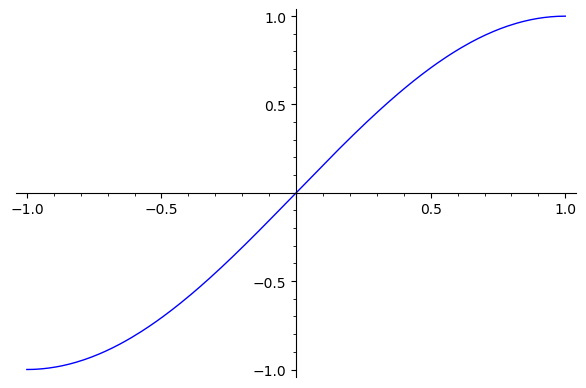

0 -1
0 -1


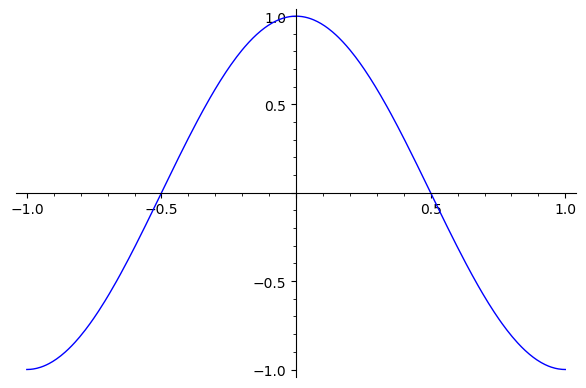

1 -1
1 1


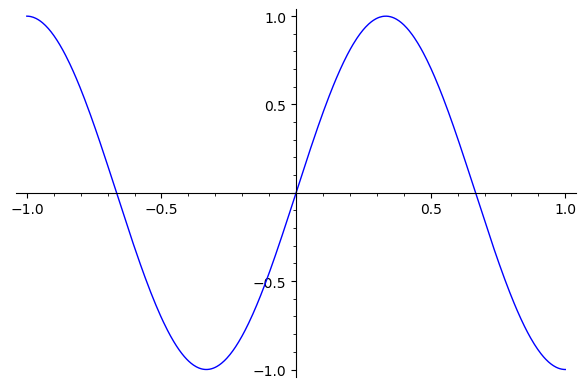

1 -1
1 -1


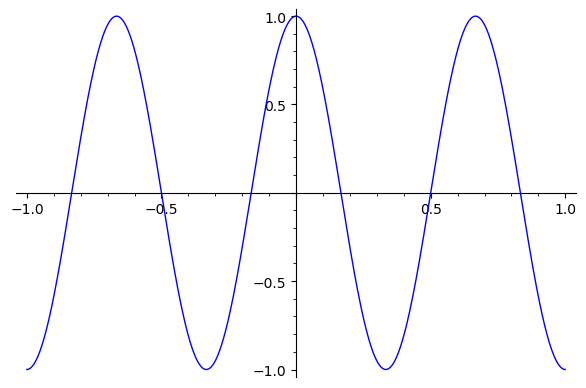

In [62]:
var("m b y")
ky_TE_sin = (2*m+1)*pi/(2*b)
ky_TE_cos = (2*m+1)*pi/(b)
TE_Hz_sin = sin(ky_TE_sin*y)
TE_Hz_cos = cos(ky_TE_cos*y)
b_val = 1
for m_val in range (0, 2):
    print(m_val, TE_Hz_sin.subs(y == b , m == m_val))
    print(m_val, TE_Hz_sin.subs(y == -b , m == m_val))
    plot(TE_Hz_sin.subs(b == b_val, m == m_val), y, -b_val, b_val).show()
    print(m_val, TE_Hz_cos.subs(y == b , m == m_val))
    print(m_val, TE_Hz_cos.subs(y == -b , m == m_val))
    plot(TE_Hz_cos.subs(b == b_val, m == m_val), y, -b_val, b_val).show()

0 0
0 0


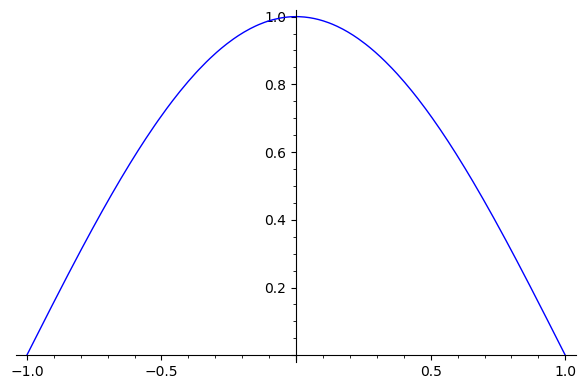

0 0
0 0


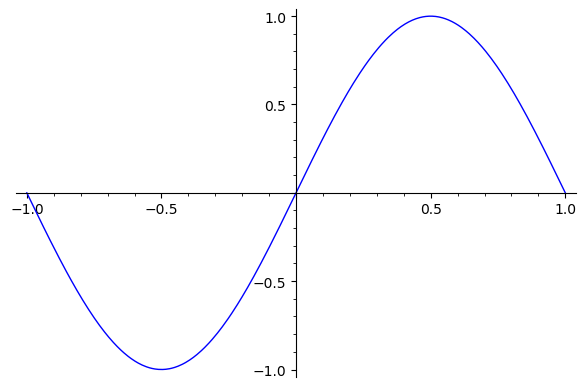

1 0
1 0


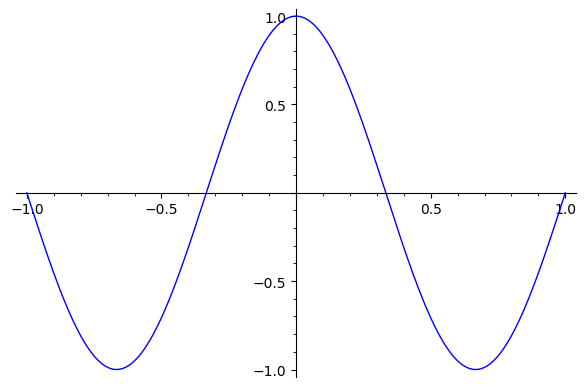

1 0
1 0


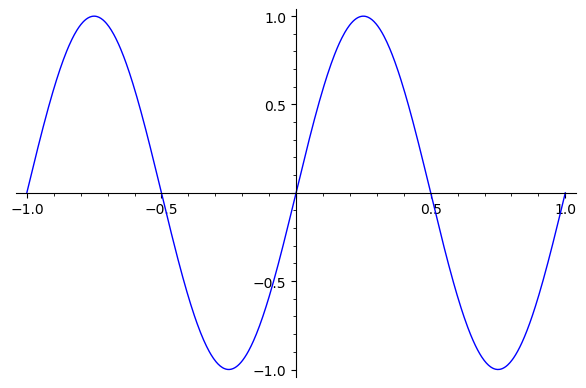

In [63]:
var("m b y")
ky_TM_cos = (1+2*m)*pi/(2*b)
ky_TM_sin = (1+m)*pi/(b)
TM_Ez_cos = cos(ky_TM_cos*y)
TM_Ez_sin = sin(ky_TM_sin*y)
b_val = 1
for m_val in range (0, 2):
    print(m_val, TM_Ez_cos.subs(y == b , m == m_val))
    print(m_val, TM_Ez_cos.subs(y == -b , m == m_val))
    plot(TM_Ez_cos.subs(b == b_val, m == m_val), y, -b_val, b_val).show()
    print(m_val, TM_Ez_sin.subs(y == b , m == m_val))
    print(m_val, TM_Ez_sin.subs(y == -b , m == m_val))
    plot(TM_Ez_sin.subs(b == b_val, m == m_val), y, -b_val, b_val).show()

## 🔹 Шаг 3: Код на SageMath с зависимостью от $y$

In [3]:
# Создаём евклидово пространство
Eu.<x, y, z> = EuclideanSpace(coordinates='Cartesian')

# Параметры
var('t omega c k_z k_y')
assume(omega > 0, c > 0, k_z, 'complex', k_y, 'real')  # ky может быть комплексным, но для PEC — вещественный

# Фазовый множитель
phase_y = exp(I * (k_y * y))
phase = exp(I * (k_z * z - omega * t)) * phase_y

# Компоненты полей (зависят от x и y!)
Ex = function('Ex')(x, y)
Ey = function('Ey')(x, y)
Ez = function('Ez')(x, y)
E_x = function('E_x')(x)
E_y = function('E_y')(x)
E_z = function('E_z')(x)# * cos(k_y * y)

Hx = function('Hx')(x, y)
Hy = function('Hy')(x, y)
Hz = function('Hz')(x, y)
H_x = function('H_x')(x)
H_y = function('H_y')(x)
H_z = function('H_z')(x)# * sin(k_y * y)

# Полные векторные поля
E_vec = Eu.vector_field(E_x * phase, E_y * phase, E_z * phase, name='E')
H_vec = Eu.vector_field(H_x * phase, H_y * phase, H_z * phase, name='H')

In [4]:
E = matrix([[E_x * phase],
            [E_y * phase],
            [E_z * phase]])
show(E)

[E_x(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]
[E_y(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]
[E_z(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]

In [5]:
H = matrix([[H_x * phase],
            [H_y * phase],
            [H_z * phase]])
show(H)

[H_x(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]
[H_y(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]
[H_z(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]

## 🔹 Шаг 4: Тензоры проницаемости (диагональные или нет)

In [6]:
# Диагональные тензоры (можно расширить до недиагональных)
epsilon_xx, epsilon_yy, epsilon_zz = var('epsilon_xx epsilon_yy epsilon_zz', domain='complex')
mu_xx, mu_yy, mu_zz                = var('mu_xx mu_yy mu_zz', domain='complex')

In [7]:
# Тензор epsilon' _anisotropic
epsilon = matrix([
    [epsilon_xx,         0,      0],
    [        0, epsilon_yy,      0],
    [        0,      0, epsilon_zz]
])

show(epsilon)

[epsilon_xx          0          0]
[         0 epsilon_yy          0]
[         0          0 epsilon_zz]

In [8]:
# _anisotropic
mu = matrix([
    [mu_xx,     0,     0],
    [0,     mu_yy,     0],
    [0,         0, mu_zz],
])
show(mu)

[mu_xx     0     0]
[    0 mu_yy     0]
[    0     0 mu_zz]

In [9]:
D = epsilon*E
show(D)

[epsilon_xx*E_x(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]
[epsilon_yy*E_y(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]
[epsilon_zz*E_z(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]

In [10]:
B = mu*H
show(B)

[mu_xx*H_x(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]
[mu_yy*H_y(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]
[mu_zz*H_z(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]

In [11]:
# Диэлектрическое смещение D = eps * E
# Магнитная индукция B = mu * H
D_vec = Eu.vector_field(D[0][0], D[1][0], D[2][0], name='D')
B_vec = Eu.vector_field(B[0][0], B[1][0], B[2][0], name='B')

## 🔹 Шаг 5: Уравнения Максвелла в частотной области

Шаг 4: Компонентные уравнения

In [12]:
from sage.manifolds.operators import curl, div, grad, laplacian

# Роторы
curl_E = curl(E_vec)      # =  i ω/c * B
curl_H = curl(H_vec)      # = -i ω/c * D

# Правые части
rhs_eq_rot_E =  I * omega / c * B_vec
rhs_eq_rot_H = -I * omega / c * D_vec

show(rhs_eq_rot_E[1].expr())
show(rhs_eq_rot_E[2].expr())
show(rhs_eq_rot_E[3].expr())

show(rhs_eq_rot_H[1].expr())
show(rhs_eq_rot_H[2].expr())
show(rhs_eq_rot_H[3].expr())

I*mu_xx*omega*H_x(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c

I*mu_yy*omega*H_y(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c

I*mu_zz*omega*H_z(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c

-I*epsilon_xx*omega*E_x(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c

-I*epsilon_yy*omega*E_y(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c

-I*epsilon_zz*omega*E_z(x)*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c

In [13]:
# Компонентные уравнения
eq_rot_E = []
eq_rot_H = []
for i in range(1, 4):
    eq1 = (curl_E[i].expr() == rhs_eq_rot_E[i].expr()).simplify_full()
    eq2 = (curl_H[i].expr() == rhs_eq_rot_H[i].expr()).simplify_full()
    # Делим обе части на phase (≠ 0)
    eq_rot_E.append(eq1.lhs() / phase == eq1.rhs() / phase)
    eq_rot_H.append(eq2.lhs() / phase == eq2.rhs() / phase)

# eqs[0] → (∂Ez/∂y - ∂Ey/∂z) = i ω/c μ_xx Hx → -i ky Ez - i kz Ey = i ω/c μ_xx Hx
# и т.д.

In [14]:
show(eq_rot_E)

[-I*k_z*E_y(x) + I*k_y*E_z(x) == I*mu_xx*omega*H_x(x)/c,
 I*k_z*E_x(x) - diff(E_z(x), x) == I*mu_yy*omega*H_y(x)/c,
 -I*k_y*E_x(x) + diff(E_y(x), x) == I*mu_zz*omega*H_z(x)/c]

In [15]:
show(eq_rot_H)

[-I*k_z*H_y(x) + I*k_y*H_z(x) == -I*epsilon_xx*omega*E_x(x)/c,
 I*k_z*H_x(x) - diff(H_z(x), x) == -I*epsilon_yy*omega*E_y(x)/c,
 -I*k_y*H_x(x) + diff(H_y(x), x) == -I*epsilon_zz*omega*E_z(x)/c]

In [16]:
def get_field(eq_rot_E, eq_rot_H, eq_rot_E_index, eq_rot_H_index, field_for_exclude, field_for_solve):
    # Группируем уравнения в пары,
    # удобные для исключения переменных поля в левой части
    excluding_1 = solve(eq_rot_E[eq_rot_E_index], field_for_exclude)
    excluding_2 = solve(eq_rot_H[eq_rot_H_index], field_for_exclude)
    if len(excluding_1) > 0 and len(excluding_2):
        # Получаем выражение для поперечных
        # (по отношению к оси волновода z)
        # компонент поля через продольные
        return (solve(
            excluding_1[0].rhs() == \
            excluding_2[0].rhs(),
        field_for_solve))[0]

In [17]:
# Группируем уравнения в пары, удобные для исключения переменных поля в левой части
eq_rot_E_index = 0
eq_rot_H_index = 1
# Получаем выражение для поперечных (по отношению к оси волновода z) компонент поля через продольные
field_for_exclude = H_x(x=x)
field_for_solve   = E_y(x=x)

E_sb_y = get_field(eq_rot_E, eq_rot_H,
                                eq_rot_E_index, eq_rot_H_index,
                                field_for_exclude, field_for_solve)
show(E_sb_y)

E_y(x) == (c^2*k_y*k_z*E_z(x) + I*c*mu_xx*omega*diff(H_z(x), x))/(c^2*k_z^2 - epsilon_yy*mu_xx*omega^2)

In [18]:
# Группируем уравнения в пары, удобные для исключения переменных поля в левой части
eq_rot_E_index = 0
eq_rot_H_index = 1
# Получаем выражение для поперечных (по отношению к оси волновода z) компонент поля через продольные
field_for_exclude = E_y(x=x)
field_for_solve   = H_x(x=x)

H_sb_x = get_field(eq_rot_E, eq_rot_H,
                                eq_rot_E_index, eq_rot_H_index,
                                field_for_exclude, field_for_solve)
show(H_sb_x)

H_x(x) == -(c*epsilon_yy*k_y*omega*E_z(x) + I*c^2*k_z*diff(H_z(x), x))/(c^2*k_z^2 - epsilon_yy*mu_xx*omega^2)

In [19]:
# Группируем уравнения в пары, удобные для исключения переменных поля в левой части
eq_rot_E_index = 1
eq_rot_H_index = 0
# Получаем выражение для поперечных (по отношению к оси волновода z) компонент поля через продольные
field_for_exclude = H_y(x=x)
field_for_solve   = E_x(x=x)

E_sb_x = get_field(eq_rot_E, eq_rot_H,
                                eq_rot_E_index, eq_rot_H_index,
                                field_for_exclude, field_for_solve)
show(E_sb_x)

E_x(x) == (c*k_y*mu_yy*omega*H_z(x) - I*c^2*k_z*diff(E_z(x), x))/(c^2*k_z^2 - epsilon_xx*mu_yy*omega^2)

In [20]:
# Группируем уравнения в пары, удобные для исключения переменных поля в левой части
eq_rot_E_index = 1
eq_rot_H_index = 0
# Получаем выражение для поперечных (по отношению к оси волновода z) компонент поля через продольные
field_for_exclude = E_x(x=x)
field_for_solve   = H_y(x=x)

H_sb_y = get_field(eq_rot_E, eq_rot_H,
                                eq_rot_E_index, eq_rot_H_index,
                                field_for_exclude, field_for_solve)
show(H_sb_y)

H_y(x) == (c^2*k_y*k_z*H_z(x) - I*c*epsilon_xx*omega*diff(E_z(x), x))/(c^2*k_z^2 - epsilon_xx*mu_yy*omega^2)

In [21]:
# ------------------------------------------------------------
# 3. Роторы → уравнения Максвелла
# ------------------------------------------------------------
curl_E = curl(E_vec)      # = i ω/c * B
curl_H = curl(H_vec)      # = -i ω/c * D

In [22]:
# ------------------------------------------------------------
# 4. Двойной ротор: ∇ × (∇ × E)
# ------------------------------------------------------------
curl_curl_E = curl(curl_E)

show(curl_curl_E[:])

[((k_y^2 + k_z^2)*E_x(x) + I*k_y*d(E_y)/dx + I*k_z*d(E_z)/dx)*e^(-I*omega*t + I*k_y*y + I*k_z*z),
 (k_z^2*E_y(x) - k_y*k_z*E_z(x) + I*k_y*d(E_x)/dx - d^2(E_y)/dx^2)*e^(-I*omega*t + I*k_y*y + I*k_z*z),
 -(k_y*k_z*E_y(x) - k_y^2*E_z(x) - I*k_z*d(E_x)/dx + d^2(E_z)/dx^2)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]

$$rot\,rot\,\vec{E} = grad\,div\,\vec{E} - Laplasian\,\vec{E}$$

In [23]:
grad_div_E = grad(div(E_vec))
laplacian_E = laplacian(E_vec)
grad_div_laplacian_E = grad_div_E - laplacian_E

In [24]:
show(div(E_vec).expr())

(I*k_y*E_y(x) + I*k_z*E_z(x) + diff(E_x(x), x))*e^(-I*omega*t + I*k_y*y + I*k_z*z)

In [25]:
show(grad_div_E[3])

-(k_y*k_z*E_y(x) + k_z^2*E_z(x) - I*k_z*d(E_x)/dx)*e^(-I*omega*t + I*k_y*y + I*k_z*z)

In [26]:
show(laplacian_E[3])

-((k_y^2 + k_z^2)*E_z(x) - d^2(E_z)/dx^2)*e^(-I*omega*t + I*k_y*y + I*k_z*z)

In [27]:
show(grad_div_laplacian_E[3])

-(k_y*k_z*E_y(x) - k_y^2*E_z(x) - I*k_z*d(E_x)/dx + d^2(E_z)/dx^2)*e^(-I*omega*t + I*k_y*y + I*k_z*z)

In [28]:
# Аналогично для H
curl_curl_H = curl(curl_H)

show(curl_curl_H[:])

[((k_y^2 + k_z^2)*H_x(x) + I*k_y*d(H_y)/dx + I*k_z*d(H_z)/dx)*e^(-I*omega*t + I*k_y*y + I*k_z*z),
 (k_z^2*H_y(x) - k_y*k_z*H_z(x) + I*k_y*d(H_x)/dx - d^2(H_y)/dx^2)*e^(-I*omega*t + I*k_y*y + I*k_z*z),
 -(k_y*k_z*H_y(x) - k_y^2*H_z(x) - I*k_z*d(H_x)/dx + d^2(H_z)/dx^2)*e^(-I*omega*t + I*k_y*y + I*k_z*z)]

Применяя к первому уравнению из этой пары операцию ротора

$$rot\,rot\,\vec{E} =  \frac{i\,\omega}{c} \, rot\left(\mu'\,\vec{H}\right)$$

In [29]:
rot_B = curl(B_vec) - mu_xx*(curl(H_vec) - rhs_eq_rot_H)
show( I * omega / c * rot_B[3] )

I*(-I*epsilon_zz*mu_xx*omega*E_z(x) - (c*mu_xx - c*mu_yy)*d(H_y)/dx)*omega*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c^2

In [30]:
# Подставляем ∇ × H = -i ω/c D → ∇ × B = μ ∇ × H = -i ω/c μ ε E
# Но делаем это явно:
rhs_curl_curl_E = I * omega / c * rot_B
show(rhs_curl_curl_E[:])

[(epsilon_xx*mu_xx*omega^2*E_x(x) - (c*k_z*mu_xx - c*k_z*mu_yy)*omega*H_y(x) + (c*k_y*mu_xx - c*k_y*mu_zz)*omega*H_z(x))*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c^2,
 (epsilon_yy*mu_xx*omega^2*E_y(x) - (-I*c*mu_xx + I*c*mu_zz)*omega*d(H_z)/dx)*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c^2,
 (epsilon_zz*mu_xx*omega^2*E_z(x) + (-I*c*mu_xx + I*c*mu_yy)*omega*d(H_y)/dx)*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c^2]

Применяя ко второму уравнению из этой пары операцию ротора

$$rot \, rot\,\vec{H} = - \frac{i\,\omega}{c} rot \left( \epsilon'  \vec E\right)$$

In [31]:
rot_D = curl(D_vec) - epsilon_xx * (curl(E_vec) - rhs_eq_rot_E)
show((-I * omega / c * rot_D[3]))

-I*(I*epsilon_xx*mu_zz*omega*H_z(x) - (c*epsilon_xx - c*epsilon_yy)*d(E_y)/dx)*omega*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c^2

In [32]:
# Аналогично для H
curl_curl_H = curl(curl_H)
rhs_curl_curl_H = -I * omega / c * rot_D
show(rhs_curl_curl_H[:])

[(epsilon_xx*mu_xx*omega^2*H_x(x) + (c*epsilon_xx - c*epsilon_yy)*k_z*omega*E_y(x) - (c*epsilon_xx - c*epsilon_zz)*k_y*omega*E_z(x))*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c^2,
 (epsilon_xx*mu_yy*omega^2*H_y(x) + (-I*c*epsilon_xx + I*c*epsilon_zz)*omega*d(E_z)/dx)*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c^2,
 (epsilon_xx*mu_zz*omega^2*H_z(x) - (-I*c*epsilon_xx + I*c*epsilon_yy)*omega*d(E_y)/dx)*e^(-I*omega*t + I*k_y*y + I*k_z*z)/c^2]

In [33]:
# Упрощаем обе части, деля на phase
lhs_ccE = [comp / phase for comp in curl_curl_E[:]]
rhs_ccE = [comp / phase for comp in rhs_curl_curl_E[:]]
show(lhs_ccE)
show(lhs_ccE)

[(k_y^2 + k_z^2)*E_x(x) + I*k_y*d(E_y)/dx + I*k_z*d(E_z)/dx,
 k_z^2*E_y(x) - k_y*k_z*E_z(x) + I*k_y*d(E_x)/dx - d^2(E_y)/dx^2,
 -k_y*k_z*E_y(x) + k_y^2*E_z(x) + I*k_z*d(E_x)/dx - d^2(E_z)/dx^2]

[(k_y^2 + k_z^2)*E_x(x) + I*k_y*d(E_y)/dx + I*k_z*d(E_z)/dx,
 k_z^2*E_y(x) - k_y*k_z*E_z(x) + I*k_y*d(E_x)/dx - d^2(E_y)/dx^2,
 -k_y*k_z*E_y(x) + k_y^2*E_z(x) + I*k_z*d(E_x)/dx - d^2(E_z)/dx^2]

In [34]:
# Аналогично для H
lhs_ccH = [comp / phase for comp in curl_curl_H[:]]
rhs_ccH = [comp / phase for comp in rhs_curl_curl_H[:]]
show(lhs_ccH)
show(rhs_ccH)

[(k_y^2 + k_z^2)*H_x(x) + I*k_y*d(H_y)/dx + I*k_z*d(H_z)/dx,
 k_z^2*H_y(x) - k_y*k_z*H_z(x) + I*k_y*d(H_x)/dx - d^2(H_y)/dx^2,
 -k_y*k_z*H_y(x) + k_y^2*H_z(x) + I*k_z*d(H_x)/dx - d^2(H_z)/dx^2]

[(epsilon_xx*mu_xx*omega^2*H_x(x) + (c*epsilon_xx - c*epsilon_yy)*k_z*omega*E_y(x) - (c*epsilon_xx - c*epsilon_zz)*k_y*omega*E_z(x))/c^2,
 (epsilon_xx*mu_yy*omega^2*H_y(x) + (-I*c*epsilon_xx + I*c*epsilon_zz)*omega*d(E_z)/dx)/c^2,
 (epsilon_xx*mu_zz*omega^2*H_z(x) - (-I*c*epsilon_xx + I*c*epsilon_yy)*omega*d(E_y)/dx)/c^2]

In [35]:
# ------------------------------------------------------------
# 5. Выбираем уравнение для продольной компоненты (TM: Ez, TE: Hz)
# ------------------------------------------------------------

In [36]:
# Для TM-волны: Hz = 0 → работаем с Ez
# Берём z-компоненту двойного ротора:
eq_TM = lhs_ccE[2].expr() - rhs_ccE[2].expr() == 0
show(eq_TM)

-k_y*k_z*E_y(x) + k_y^2*E_z(x) + I*k_z*diff(E_x(x), x) - (epsilon_zz*mu_xx*omega^2*E_z(x) + (-I*c*mu_xx + I*c*mu_yy)*omega*diff(H_y(x), x))/c^2 - diff(E_z(x), x, x) == 0

In [37]:
# Для TE-волны: Ez = 0 → работаем с Hz
# Берём z-компоненту двойного ротора:
eq_TE = lhs_ccH[2].expr() - rhs_ccH[2].expr() == 0
show(eq_TE)

-k_y*k_z*H_y(x) + k_y^2*H_z(x) + I*k_z*diff(H_x(x), x) - (epsilon_xx*mu_zz*omega^2*H_z(x) - (-I*c*epsilon_xx + I*c*epsilon_yy)*omega*diff(E_y(x), x))/c^2 - diff(H_z(x), x, x) == 0

## 🔹 Шаг 6: Исключение поперечных компонент → волновое уравнение

Подставляем выражение для поперечных компонент

### Для TE-моды ($E_z = 0$):

$$\frac{\partial^{2}}{(\partial {x})^{2}}{H_z}(x,y) + K_{x,TE}^2\,{H_z}(x,y) = 0$$

In [38]:
eq_TE = eq_TE \
    .substitute_function(E_sb_y) \
    .substitute_function(E_sb_x) \
    .substitute_function(H_sb_y) \
    .substitute_function(H_sb_x) \
    .expand()
show(eq_TE)

-c^2*k_y^2*k_z^2*H_z(x)/(c^2*k_z^2 - epsilon_xx*mu_yy*omega^2) - I*c*epsilon_xx*k_y*k_z*omega*diff(E_z(x), x)/(c^2*k_z^2 - epsilon_yy*mu_xx*omega^2) + I*c*epsilon_xx*k_y*k_z*omega*diff(E_z(x), x)/(c^2*k_z^2 - epsilon_xx*mu_yy*omega^2) + c^2*k_z^2*diff(H_z(x), x, x)/(c^2*k_z^2 - epsilon_yy*mu_xx*omega^2) + epsilon_xx*mu_xx*omega^2*diff(H_z(x), x, x)/(c^2*k_z^2 - epsilon_yy*mu_xx*omega^2) - epsilon_yy*mu_xx*omega^2*diff(H_z(x), x, x)/(c^2*k_z^2 - epsilon_yy*mu_xx*omega^2) + k_y^2*H_z(x) - epsilon_xx*mu_zz*omega^2*H_z(x)/c^2 - diff(H_z(x), x, x) == 0

In [39]:
eq_TE_k_Hz = eq_TE.lhs().coefficient(H_z).factor()
show(eq_TE_k_Hz)

-(c^2*k_y^2*mu_yy + c^2*k_z^2*mu_zz - epsilon_xx*mu_yy*mu_zz*omega^2)*epsilon_xx*omega^2/((c^2*k_z^2 - epsilon_xx*mu_yy*omega^2)*c^2)

In [40]:
eq_TE_k_d2Hz_dx2 = eq_TE.lhs().coefficient(diff(H_z(x=x),x,2)).factor()
show(eq_TE_k_d2Hz_dx2)

epsilon_xx*mu_xx*omega^2/(c^2*k_z^2 - epsilon_yy*mu_xx*omega^2)

In [41]:
K2_x_TE = (eq_TE_k_Hz/eq_TE_k_d2Hz_dx2)
show(K2_x_TE)

-(c^2*k_y^2*mu_yy + c^2*k_z^2*mu_zz - epsilon_xx*mu_yy*mu_zz*omega^2)*(c^2*k_z^2 - epsilon_yy*mu_xx*omega^2)/((c^2*k_z^2 - epsilon_xx*mu_yy*omega^2)*c^2*mu_xx)

In [50]:
K2_x_TE

-(c^2*k_y^2*mu_yy + c^2*k_z^2*mu_zz - epsilon_xx*mu_yy*mu_zz*omega^2)*(c^2*k_z^2 - epsilon_yy*mu_xx*omega^2)/((c^2*k_z^2 - epsilon_xx*mu_yy*omega^2)*c^2*mu_xx)

In [49]:
show(K2_x_TE.subs(k_y == 0).factor().expand())

-k_z^2*mu_zz/mu_xx + epsilon_yy*mu_zz*omega^2/c^2

### Для TM-моды ($H_z = 0$):

$$\frac{\partial^{2}}{(\partial {x})^{2}}{E_z}(x,y) + K_{x,TM}^2\,{E_z}(x,y) = 0$$

In [43]:
eq_TM = eq_TM \
    .substitute_function(E_sb_y) \
    .substitute_function(E_sb_x) \
    .substitute_function(H_sb_y) \
    .substitute_function(H_sb_x) \
    .expand()
show(eq_TM)

-c^2*k_y^2*k_z^2*E_z(x)/(c^2*k_z^2 - epsilon_yy*mu_xx*omega^2) - I*c*k_y*k_z*mu_xx*omega*diff(H_z(x), x)/(c^2*k_z^2 - epsilon_yy*mu_xx*omega^2) + I*c*k_y*k_z*mu_xx*omega*diff(H_z(x), x)/(c^2*k_z^2 - epsilon_xx*mu_yy*omega^2) + c^2*k_z^2*diff(E_z(x), x, x)/(c^2*k_z^2 - epsilon_xx*mu_yy*omega^2) + epsilon_xx*mu_xx*omega^2*diff(E_z(x), x, x)/(c^2*k_z^2 - epsilon_xx*mu_yy*omega^2) - epsilon_xx*mu_yy*omega^2*diff(E_z(x), x, x)/(c^2*k_z^2 - epsilon_xx*mu_yy*omega^2) + k_y^2*E_z(x) - epsilon_zz*mu_xx*omega^2*E_z(x)/c^2 - diff(E_z(x), x, x) == 0

In [44]:
eq_TM_k_Ez = eq_TM.lhs().coefficient(E_z).factor()
show(eq_TM_k_Ez)

-(c^2*epsilon_yy*k_y^2 + c^2*epsilon_zz*k_z^2 - epsilon_yy*epsilon_zz*mu_xx*omega^2)*mu_xx*omega^2/((c^2*k_z^2 - epsilon_yy*mu_xx*omega^2)*c^2)

In [45]:
eq_TM_k_d2Ez_dx2 = eq_TM.lhs().coefficient(diff(E_z(x=x),x,2)).factor()
show(eq_TM_k_d2Ez_dx2)

epsilon_xx*mu_xx*omega^2/(c^2*k_z^2 - epsilon_xx*mu_yy*omega^2)

In [46]:
K2_x_TM = (eq_TM_k_Ez/eq_TM_k_d2Ez_dx2)
show(K2_x_TM)

-(c^2*epsilon_yy*k_y^2 + c^2*epsilon_zz*k_z^2 - epsilon_yy*epsilon_zz*mu_xx*omega^2)*(c^2*k_z^2 - epsilon_xx*mu_yy*omega^2)/((c^2*k_z^2 - epsilon_yy*mu_xx*omega^2)*c^2*epsilon_xx)

In [51]:
K2_x_TM

-(c^2*epsilon_yy*k_y^2 + c^2*epsilon_zz*k_z^2 - epsilon_yy*epsilon_zz*mu_xx*omega^2)*(c^2*k_z^2 - epsilon_xx*mu_yy*omega^2)/((c^2*k_z^2 - epsilon_yy*mu_xx*omega^2)*c^2*epsilon_xx)

In [48]:
show(K2_x_TM.subs(k_y == 0).factor().expand())

-epsilon_zz*k_z^2/epsilon_xx + epsilon_zz*mu_yy*omega^2/c^2